# Handling Time Series

```python
df.rolling(windows=n) #rolling window 연산을 가능하게 한다.
df.ewm() # exponential weighted function을 제공한다.
df.expanding() #expanding 연산을 가능하게 한다.
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
s = pd.Series(np.random.randn(1000),
              index=pd.date_range('1/1/2015', periods=1000))

<AxesSubplot:>

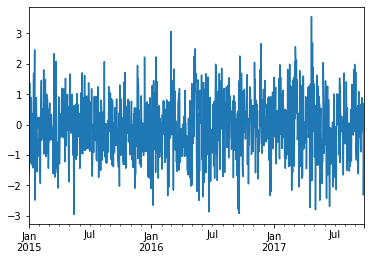

In [3]:
s.plot()

<AxesSubplot:>

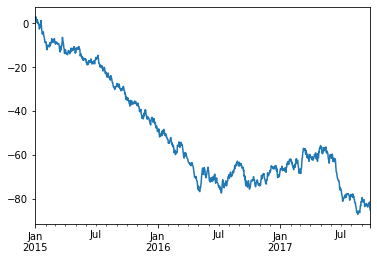

In [4]:
s1 = s.cumsum()
s1.plot()

In [5]:
r = s1.rolling(window=30)
r.mean()

2015-01-01          NaN
2015-01-02          NaN
2015-01-03          NaN
2015-01-04          NaN
2015-01-05          NaN
                ...    
2017-09-22   -82.680975
2017-09-23   -82.560673
2017-09-24   -82.409528
2017-09-25   -82.323978
2017-09-26   -82.341941
Freq: D, Length: 1000, dtype: float64

<AxesSubplot:>

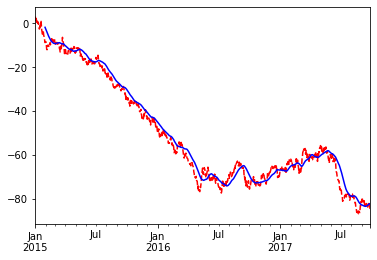

In [6]:
# 이동평균 
s1.plot(style='r--')
r.mean().plot(style='b')

In [7]:
df = pd.DataFrame(np.random.randn(1000, 4),
                  index=pd.date_range('1/1/2015', periods=1000),
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

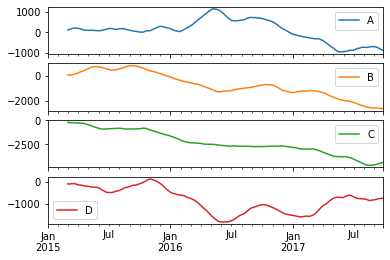

In [8]:
df.rolling(window=60).sum().plot(subplots=True)

<AxesSubplot:>

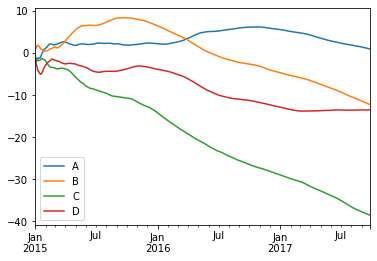

In [9]:
df.rolling(window=len(df), min_periods=1).mean().plot()

In [10]:
dfe = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]})
dfe

,B
0,0.0
1,1.0
2,2.0
3,NaN
4,4.0


<AxesSubplot:>

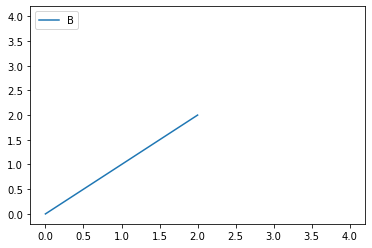

In [11]:
dfe.plot()

<AxesSubplot:>

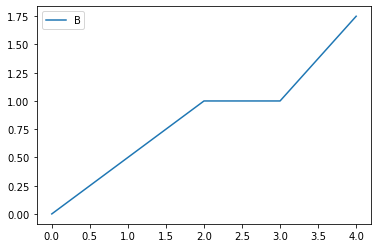

In [12]:
dfe.expanding(1).mean().plot()

<AxesSubplot:>

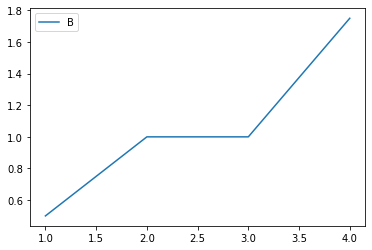

In [13]:
dfe.expanding(2).mean().plot()

<AxesSubplot:>

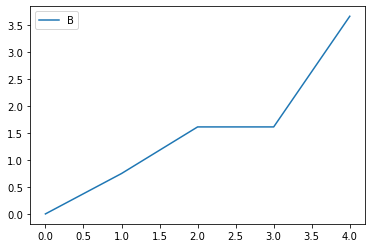

In [14]:
dfe.ewm(com=0.5, adjust=True).mean().plot()

## Plot Series

- 'line' : line plot (default)
- 'bar' : vertical bar plot
- 'barh' : horizontal bar plot
- 'hist' : histogram
- 'box' : boxplot
- 'kde' : Kernel Density Estimation plot
- 'density' : same as 'kde'
- 'area' : area plot
- 'pie' : pie plot
- 'scatter' : scatter plot
- 'hexbin' : hexbin plot

## Lineplot

In [15]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))

<AxesSubplot:>

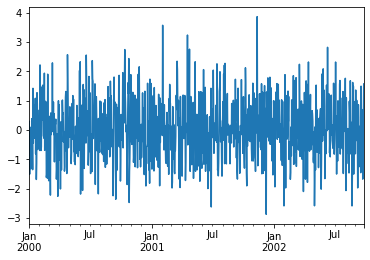

In [16]:
ts.plot()

In [17]:
ts = ts.cumsum()

<AxesSubplot:>

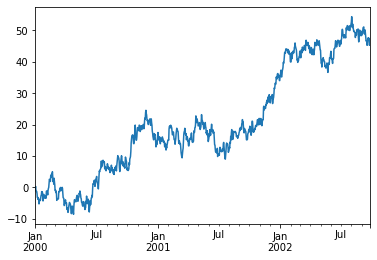

In [18]:
ts.plot()

In [19]:
df = pd.DataFrame(np.random.randn(1000, 4),
                  index=ts.index, columns=list('ABCD'))

<AxesSubplot:>

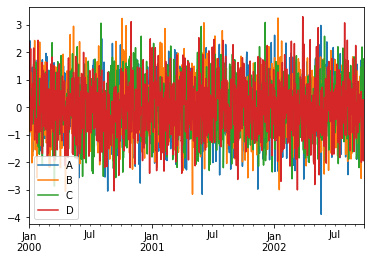

In [20]:
df.plot()

In [21]:
df = df.cumsum()

<AxesSubplot:>

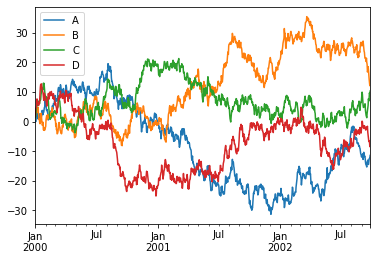

In [22]:
df.plot()

## Barplot

In [23]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))
ts.head()

2000-01-01    0.297581
2000-01-02    1.001465
2000-01-03    0.319959
2000-01-04    1.910282
2000-01-05   -0.346489
Freq: D, dtype: float64

In [24]:
df.iloc[5]

A    3.232189
B    3.403363
C    5.384205
D    7.670650
Name: 2000-01-06 00:00:00, dtype: float64

<AxesSubplot:>

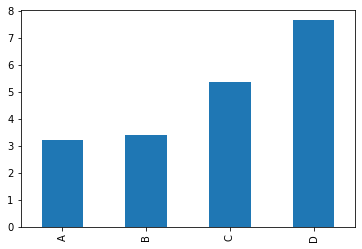

In [25]:
df.iloc[5].plot(kind='bar')

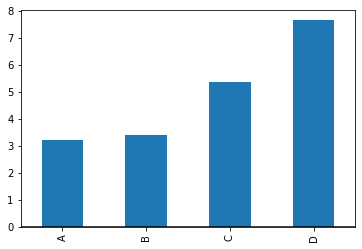

In [26]:
df.iloc[5].plot.bar()
plt.axhline(0, color='k')

In [27]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2.head(3)

,a,b,c,d
0,0.614695,0.080103,0.726556,0.709161
1,0.453383,0.450004,0.686047,0.701566
2,0.083725,0.375061,0.934685,0.017531


<AxesSubplot:>

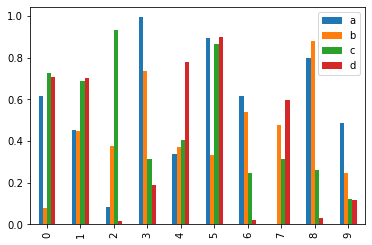

In [28]:
df2.plot.bar()

<AxesSubplot:>

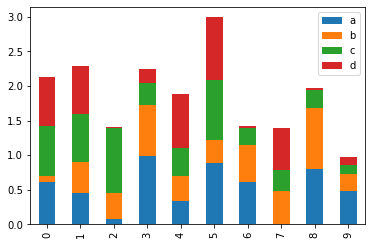

In [29]:
df2.plot.bar(stacked=True)

<AxesSubplot:>

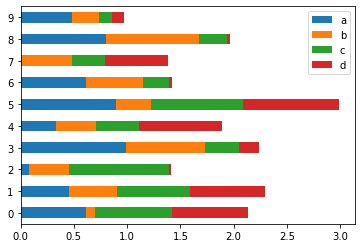

In [30]:
df2.plot.barh(stacked=True)

## Boxplot

In [31]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])

In [32]:
df.describe()

,A,B,C,D,E
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.508138,0.596150,0.515710,0.626034,0.532433
std,0.257661,0.210238,0.298678,0.291004,0.274740
min,0.181512,0.244665,0.051583,0.063853,0.033056
25%,0.326841,0.539549,0.279145,0.396040,0.319475
50%,0.476986,0.651649,0.556176,0.751178,0.605105
75%,0.697722,0.702634,0.741501,0.868613,0.706061
max,0.946789,0.911424,0.940543,0.896209,0.853190


<AxesSubplot:>

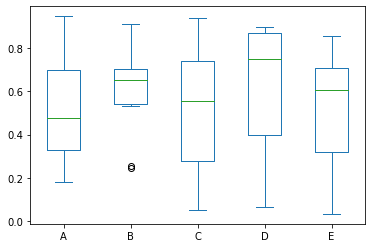

In [33]:
df.plot.box()

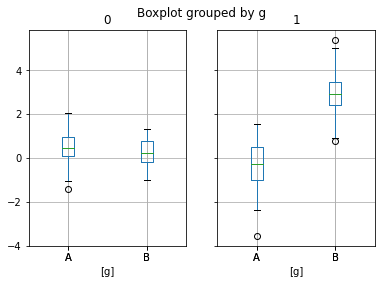

In [34]:
np.random.seed(1234)
df_box = pd.DataFrame(np.random.randn(50, 2))
df_box['g'] = np.random.choice(['A', 'B'], size=50)
# g 컬럼에서 B 값을 갖는 데이터만 가져와서 컬럼1에 들어있는 g가 B인 데이터만 3씩 더해주게 되면
# 비슷했던 스케일이 +3이 더해져서 표시되게 됩니다.
df_box.loc[df_box['g'] == 'B', 1] += 3
bp = df_box.boxplot(by='g')

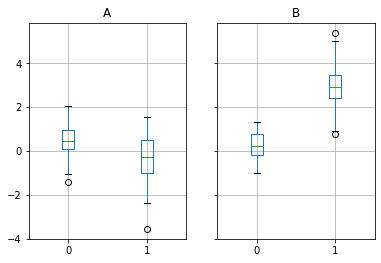

In [35]:
bp = df_box.groupby('g').boxplot()

## Area Plot

In [36]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.head()

,a,b,c,d
0,0.556895,0.084774,0.333002,0.728429
1,0.142435,0.552469,0.273043,0.974495
2,0.667787,0.255653,0.108311,0.776181
3,0.782478,0.761604,0.914403,0.658623
4,0.568368,0.201756,0.698296,0.952195


<AxesSubplot:>

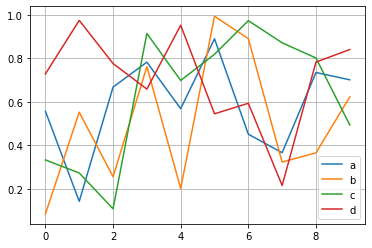

In [37]:
df.plot(grid=True)

<AxesSubplot:>

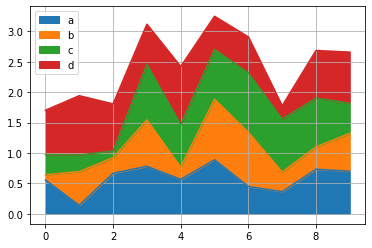

In [38]:
df.plot(kind='area',grid=True)

<AxesSubplot:>

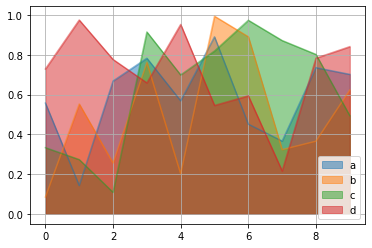

In [39]:
df.plot(kind='area',stacked=False,grid=True)

## Scatter Plot

In [40]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])

<AxesSubplot:xlabel='a', ylabel='b'>

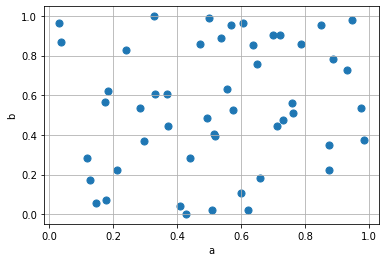

In [41]:
df.plot.scatter(x='a', y='b', s=50, grid=True)

<AxesSubplot:xlabel='c', ylabel='d'>

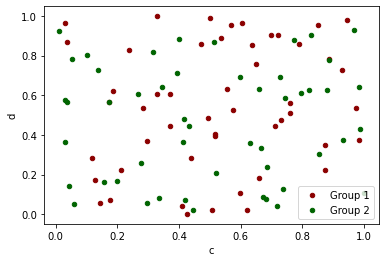

In [42]:
ax = df.plot.scatter(x='a', y='b', color='DarkRed', label='Group 1')
df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax)

## Hexagonal Bin Plot

In [43]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df['b'] = df['b'] + np.arange(1000)

<AxesSubplot:xlabel='a', ylabel='b'>

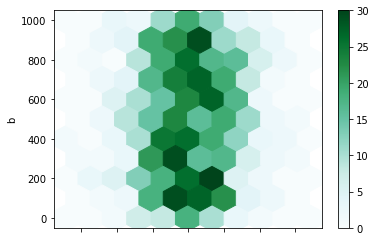

In [44]:
df.plot.hexbin(x='a', y='b', gridsize=10)

In [45]:
df['z'] = np.random.uniform(0, 3, 1000)

<AxesSubplot:xlabel='a', ylabel='b'>

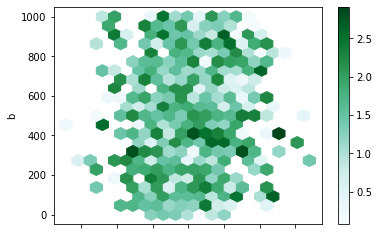

In [46]:
df.plot.hexbin(x='a', y='b', C='z', 
               reduce_C_function=np.median, gridsize=20)

## Pie Chart

In [47]:
series = pd.Series(3 * np.random.rand(4),
                   index=['a', 'b', 'c', 'd'], name='series')

<AxesSubplot:ylabel='series'>

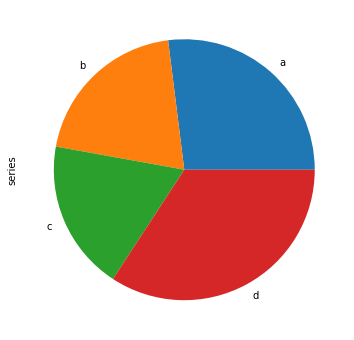

In [48]:
series.plot.pie(figsize=(6, 6))

## Scatter Matrix

In [49]:
from pandas.plotting import scatter_matrix
df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])
df.head()

,a,b,c,d
0,-0.263258,-0.814882,2.373900,1.007769
1,-2.182215,-0.609295,1.187987,0.984579
2,0.414772,-0.250405,-1.399958,-1.423211
3,-0.138343,-0.727586,1.112539,0.031395
4,0.391595,-0.143466,-0.431082,-0.673157


array([[<AxesSubplot:xlabel='a', ylabel='a'>,
        <AxesSubplot:xlabel='b', ylabel='a'>,
        <AxesSubplot:xlabel='c', ylabel='a'>,
        <AxesSubplot:xlabel='d', ylabel='a'>],
       [<AxesSubplot:xlabel='a', ylabel='b'>,
        <AxesSubplot:xlabel='b', ylabel='b'>,
        <AxesSubplot:xlabel='c', ylabel='b'>,
        <AxesSubplot:xlabel='d', ylabel='b'>],
       [<AxesSubplot:xlabel='a', ylabel='c'>,
        <AxesSubplot:xlabel='b', ylabel='c'>,
        <AxesSubplot:xlabel='c', ylabel='c'>,
        <AxesSubplot:xlabel='d', ylabel='c'>],
       [<AxesSubplot:xlabel='a', ylabel='d'>,
        <AxesSubplot:xlabel='b', ylabel='d'>,
        <AxesSubplot:xlabel='c', ylabel='d'>,
        <AxesSubplot:xlabel='d', ylabel='d'>]], dtype=object)

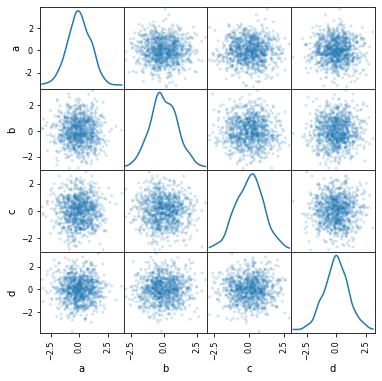

In [50]:
# kde - 커널밀도함수
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

## Kernel Density Estimate Plot

In [51]:
ser = pd.Series(np.random.randn(1000))

<AxesSubplot:ylabel='Frequency'>

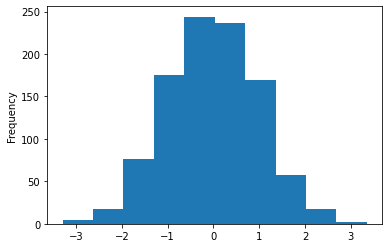

In [52]:
ser.plot.hist()

<AxesSubplot:ylabel='Density'>

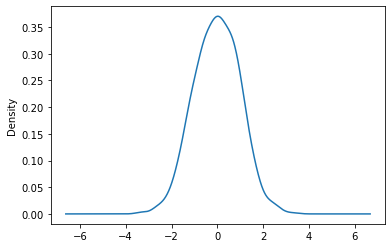

In [53]:
ser.plot.density()

<AxesSubplot:ylabel='Density'>

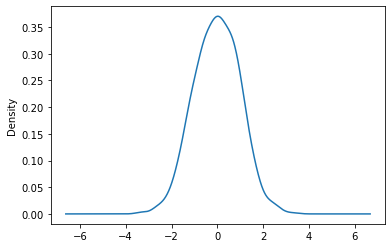

In [54]:
ser.plot.kde()